<h1> Project: Dengue Data Analysis</h2>

<h3> Analyst: Cedrix Ian Nocum</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')



In [2]:
dengue = pd.read_csv('dengue.csv')

<h1> Categorical Data Fields </h1>

In [3]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [4]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1> Filling up Missing values in the data frame </h1>

In [5]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64


<h1> Question 1 : Which month has the most dengue cases? </h1>

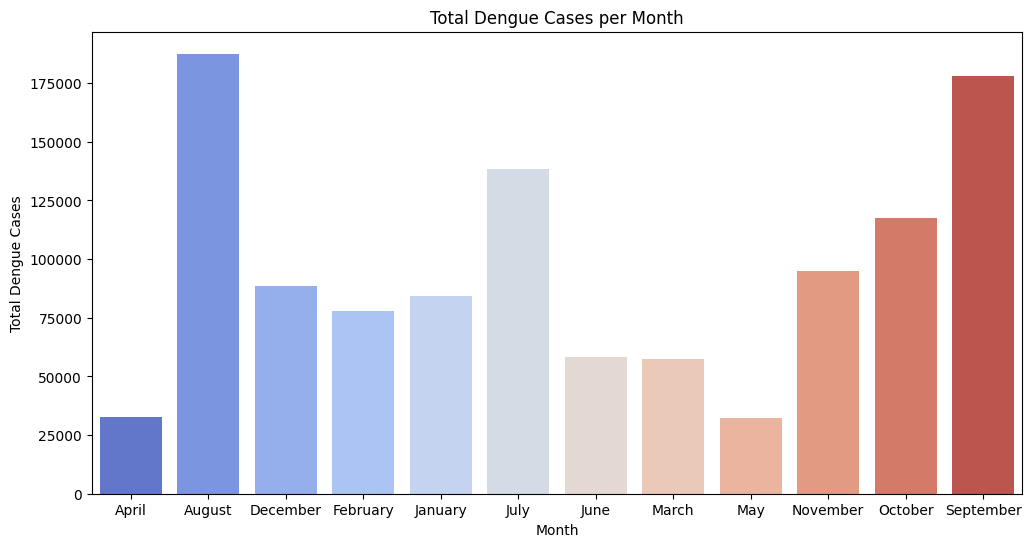

In [6]:
month_case = dengue.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=month_case.index, y=month_case.values, palette="coolwarm")
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.title('Total Dengue Cases per Month')
plt.show()


<h1> Insight 1 </h1>

<h1 > August Have the highest Case </h1>


<h1> Question 2 : What is the Highest dengue cases over the years? </h1>

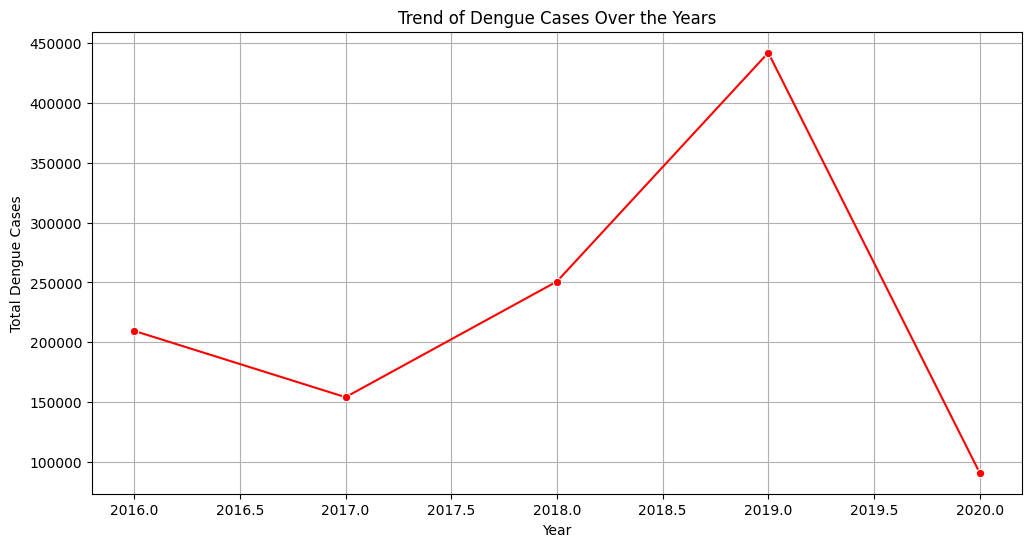

In [7]:
year_case = dengue.groupby('Year')['Dengue_Cases'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=year_case.index, y=year_case.values, marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.title('Trend of Dengue Cases Over the Years')
plt.grid()
plt.show()


<h1> Insight 2 </h1>

<h1 > Every year the number of cases increases there are spikes in certain years. </h1>


<h1> Question 3 : Which Region Has the Most Dengue Cases </h1>

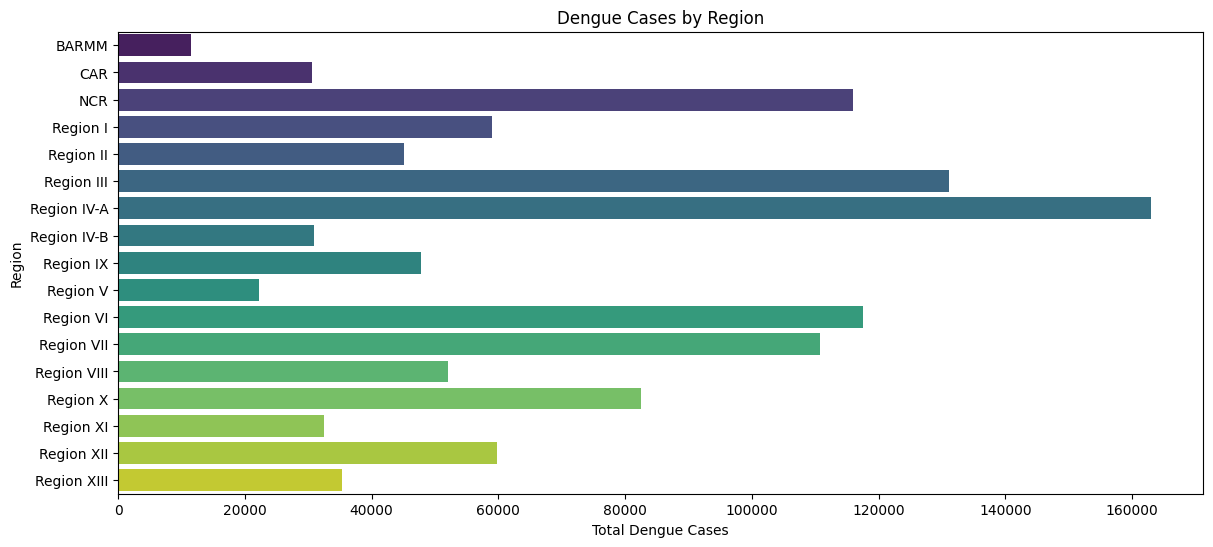

In [8]:
cases_region = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(y=cases_region.index, x=cases_region.values, palette="viridis")
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')
plt.title('Dengue Cases by Region')
plt.show()


<h1> Insight 3 </h1>

<h1 > Region IV-A have the Highest </h1>

<h1> Question 4 : How do dengue deaths vary by region? </h1>

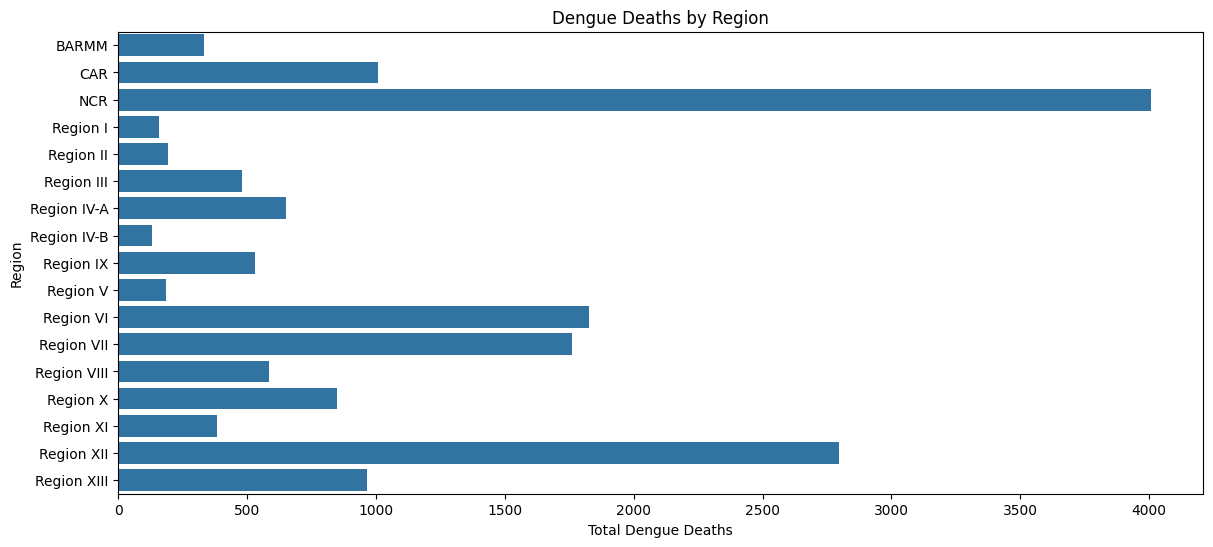

In [9]:
deaths_by_region = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(y=deaths_by_region.index, x=deaths_by_region.values)
plt.xlabel('Total Dengue Deaths')
plt.ylabel('Region')
plt.title('Dengue Deaths by Region')
plt.show()


<h1> Insight 4 </h1>

<h1 >  Some regions experience higher mortality rates despite fewer cases, But the highest is NCR </h1>

<h1> Question 5 : What is the correlation between dengue cases and deaths? </h1>

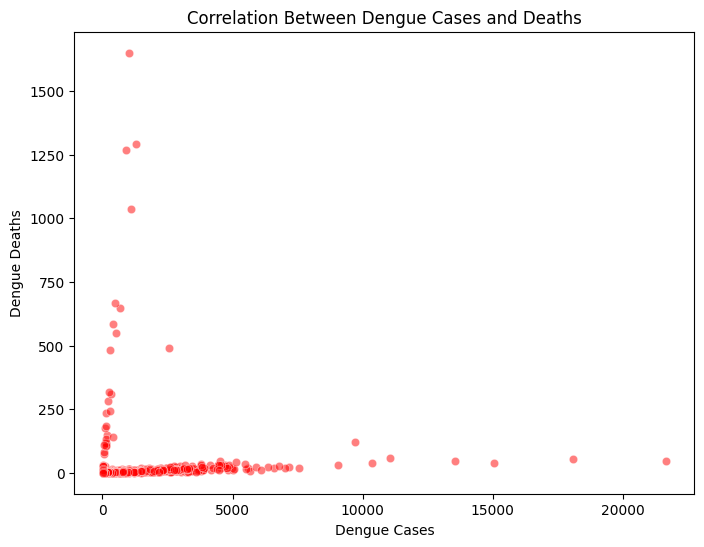

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], alpha=0.5, color='RED')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.title('Correlation Between Dengue Cases and Deaths')
plt.show()


<h1> Insight 5 </h1>

<h1 >  More cases generally lead to more deaths, </h1>

<h1> Question 6 : Heatmap of Dengue Cases by Month and Region </h1>

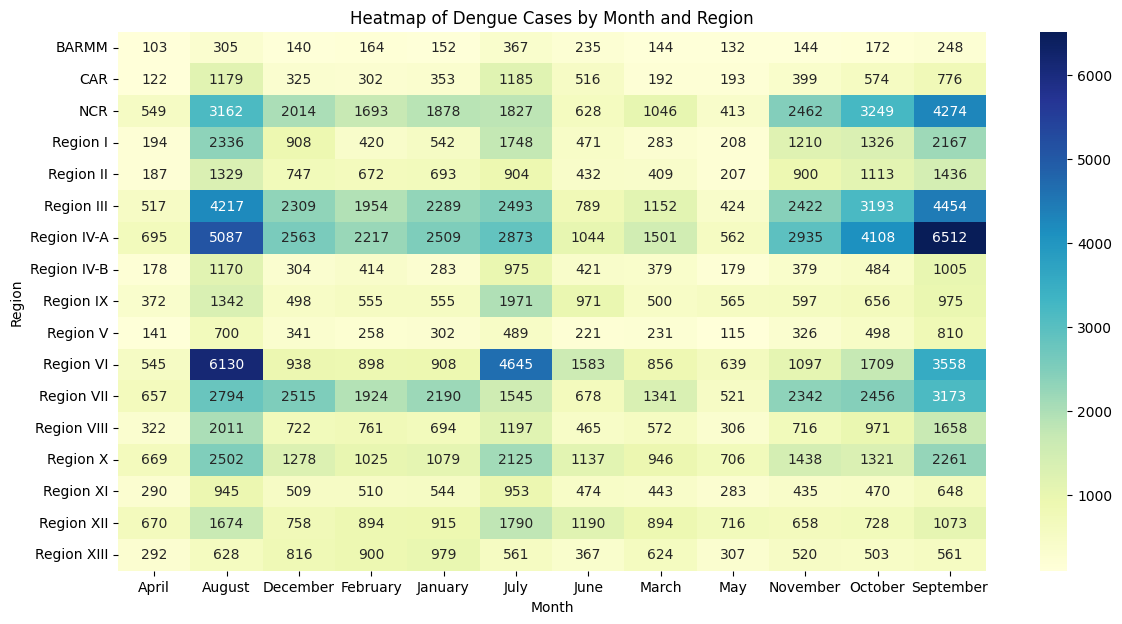

In [11]:
heatmap_data = dengue.pivot_table(index='Region', columns='Month', values='Dengue_Cases',)

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.xlabel('Month')
plt.ylabel('Region')
plt.title('Heatmap of Dengue Cases by Month and Region')
plt.show()


<h1> Insight 6 </h1>

<h1 >  Some regions consistently see higher cases. </h1>

<h1> Question 7 : What is the mortality rate over time? </h1>

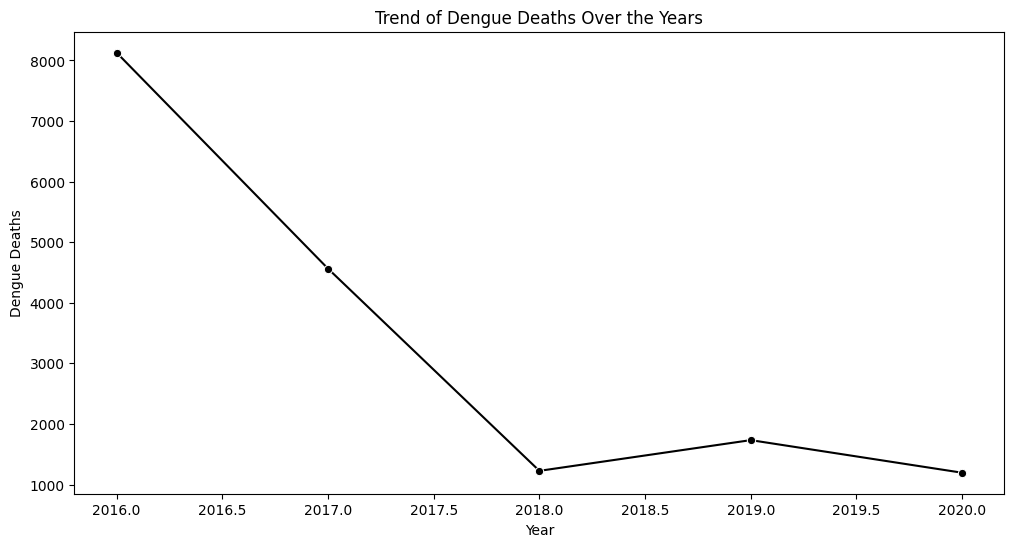

In [12]:
deaths_by_year = dengue.groupby('Year')['Dengue_Deaths'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=deaths_by_year.index, y=deaths_by_year.values, marker='o', color='black')

plt.xlabel('Year')
plt.ylabel('Dengue Deaths')
plt.title('Trend of Dengue Deaths Over the Years')
plt.show()


<h1> Insight 7 </h1>

<h1> 2016 have the highest total of Death rate </h1>

<h1> Question 8 : Monthly Trend of Dengue Deaths Over the Years </h1>

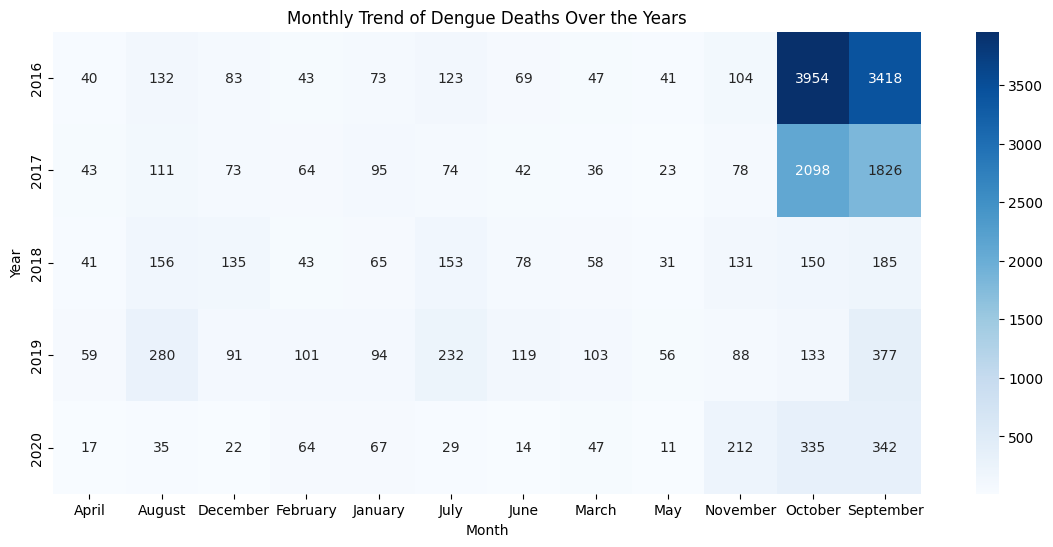

In [13]:
monthly_deaths = dengue.groupby(['Year', 'Month'])['Dengue_Deaths'].sum().unstack()

plt.figure(figsize=(14, 6))
sns.heatmap(monthly_deaths, cmap='Blues', annot=True, fmt='.0f')

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly Trend of Dengue Deaths Over the Years')
plt.show()


<h1> Insight 8 </h1>

<h1> Some months consistently show high mortality, </h1>

<h1> Question 9 : Histogram of Dengue Cases </h1>

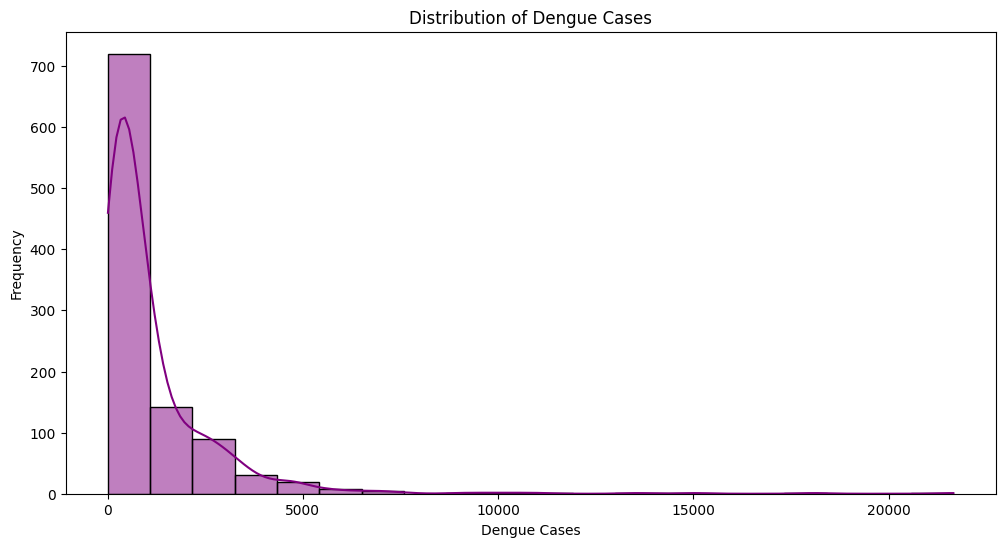

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(dengue['Dengue_Cases'], bins=20, kde=True, color='purple')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Dengue Cases')
plt.show()


 <h1> Question 9 : What is the mortality rate of dengue over the years </h1>

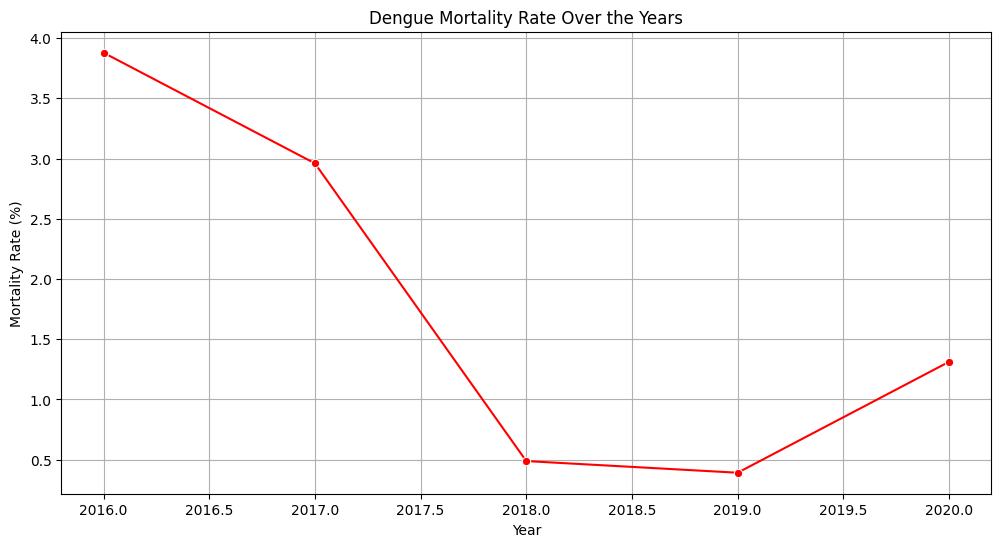

In [15]:
plt.figure(figsize=(12, 6))
mortality_rate = (dengue.groupby("Year")["Dengue_Deaths"].sum() / dengue.groupby("Year")["Dengue_Cases"].sum()) * 100
sns.lineplot(x=mortality_rate.index, y=mortality_rate.values, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Mortality Rate (%)")
plt.title("Dengue Mortality Rate Over the Years")
plt.grid()
plt.show()


<h1> Insight 10 </h1>

<h1> 2016 have the highest dengue mortality rate and 2019 have the lowest </h1>

<h1> Question 11 : What percentage of dengue cases come from each region? </h1>

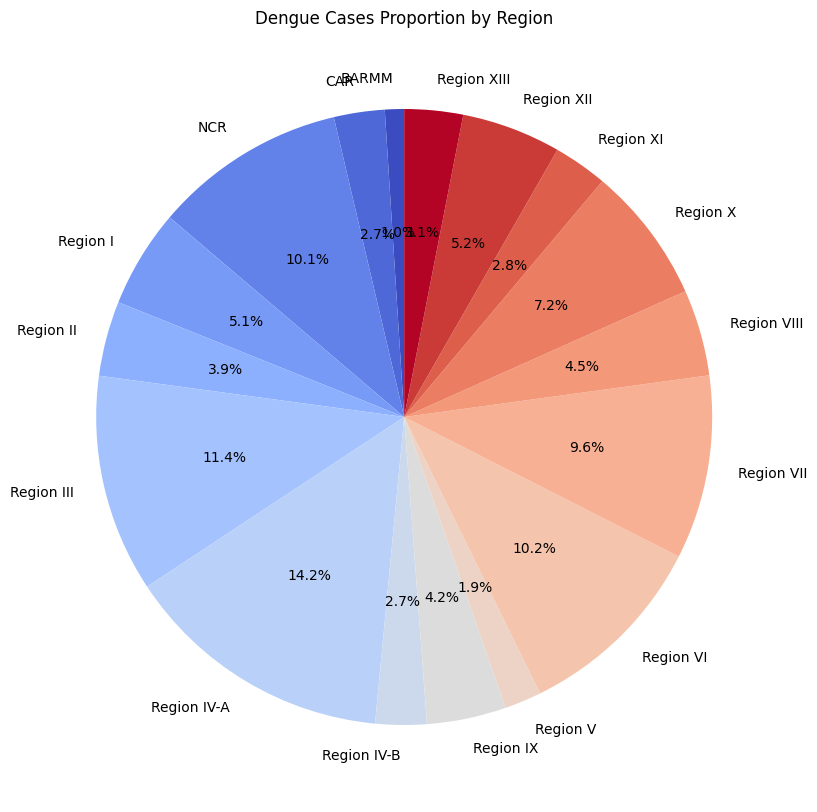

In [16]:
cases_by_region = dengue.groupby("Region")["Dengue_Cases"].sum()
plt.figure(figsize=(10, 10))
cases_by_region.plot.pie(autopct="%1.1f%%", colormap="coolwarm", startangle=90)
plt.ylabel("")
plt.title("Dengue Cases Proportion by Region")
plt.show()


<h1> Question 12 : Which areas have the most rapid growth in cases over time? </h1>

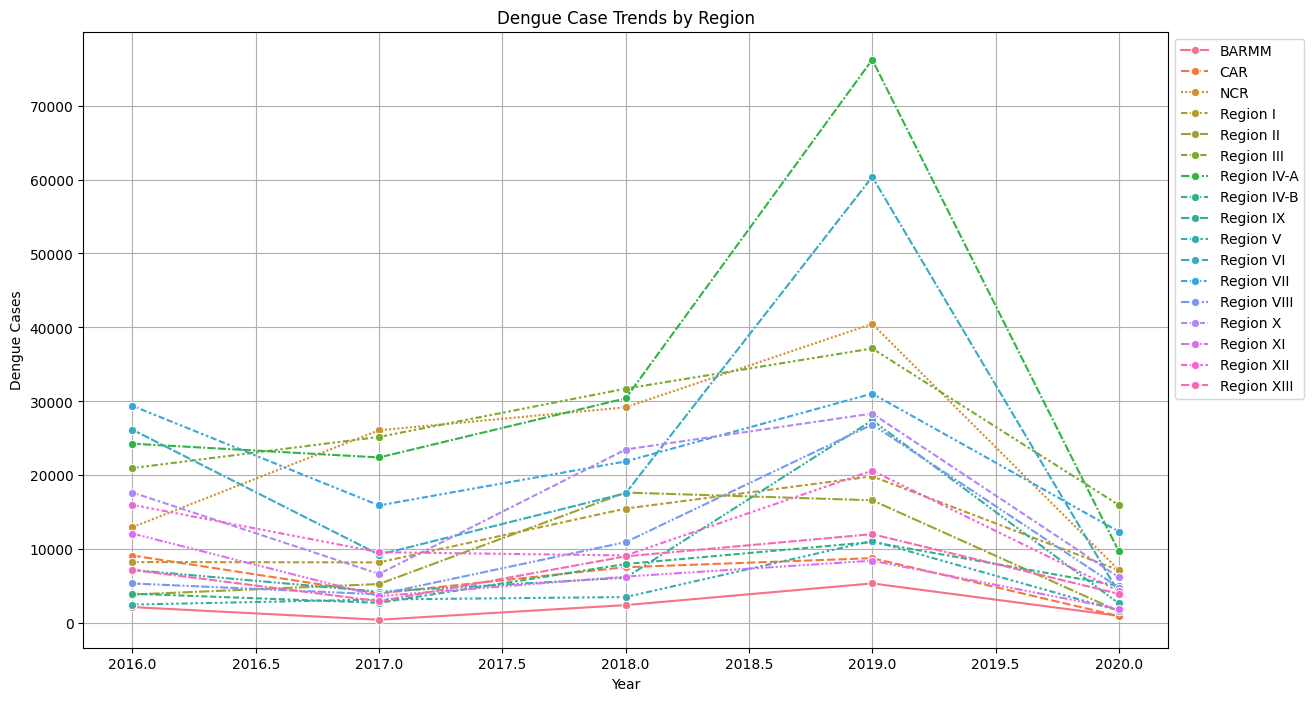

In [17]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=dengue.groupby(["Year", "Region"])["Dengue_Cases"].sum().unstack(), marker="o")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.title("Dengue Case Trends by Region")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


<h1> Insight 12 </h1>

<h1> Region IV - A has a rapid growth in cases over time </h1>

<h1> Question 13 : What is the average rate of dengue mortality by region? </h1>

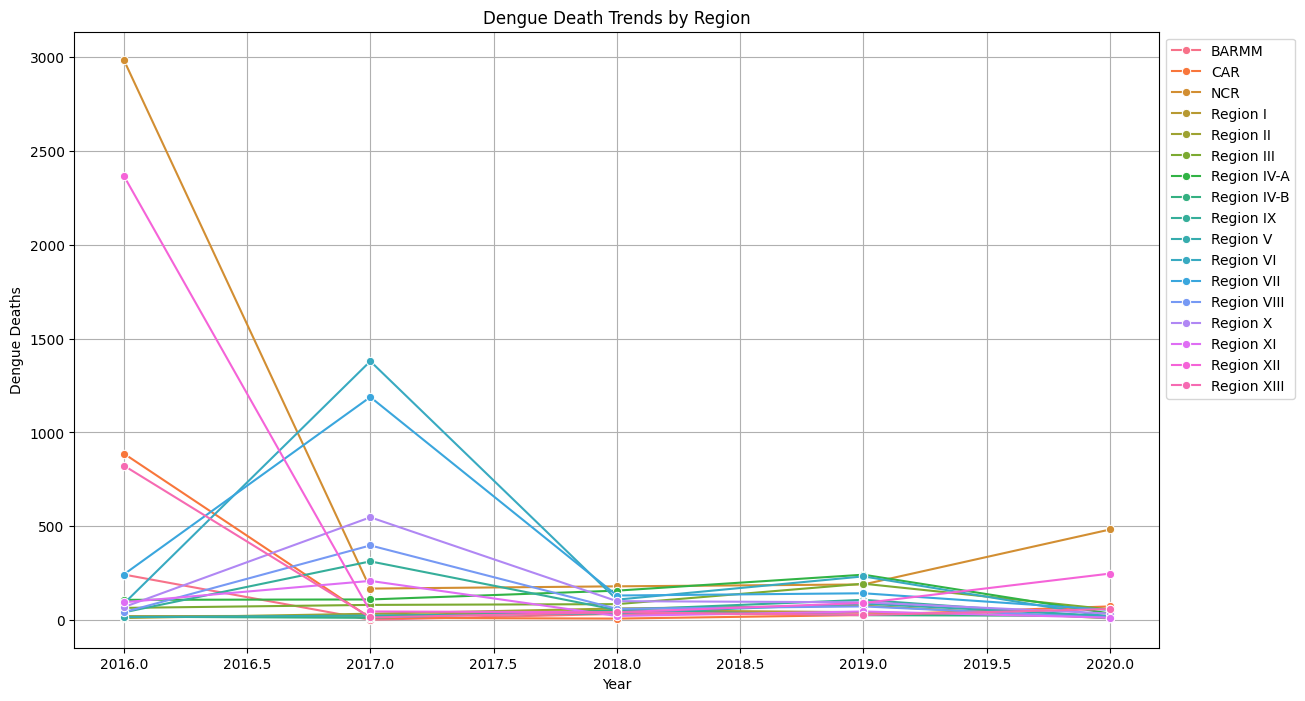

In [18]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=dengue.groupby(["Year", "Region"])["Dengue_Deaths"].sum().unstack(), marker="o", dashes=False)
plt.xlabel("Year")
plt.ylabel("Dengue Deaths")
plt.title("Dengue Death Trends by Region")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


<h1> Insight 13 </h1>

<h1> In the line plot NCR have the highest mortality rate compare to other region  </h1>

<h1> Question 14 : How do dengue cases vary across different months in each region? </h1>

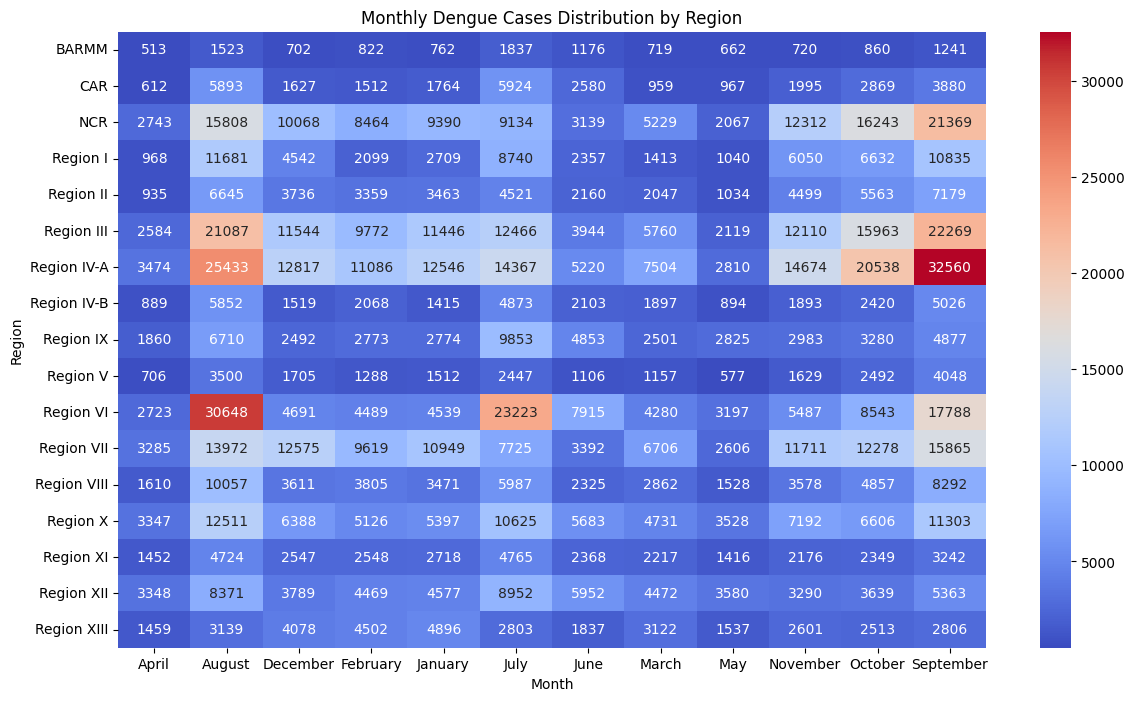

In [19]:
plt.figure(figsize=(14, 8))
sns.heatmap(dengue.pivot_table(index="Region", columns="Month", values="Dengue_Cases", aggfunc="sum"), cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Month")
plt.ylabel("Region")
plt.title("Monthly Dengue Cases Distribution by Region")
plt.show()


<h1> Insight 14 </h1>

<h1> Certain months may show highest values in specific regions, leading targeted responses. </h1>

<h1> Question 15 : How does dengue mortality rate vary by region </h1>

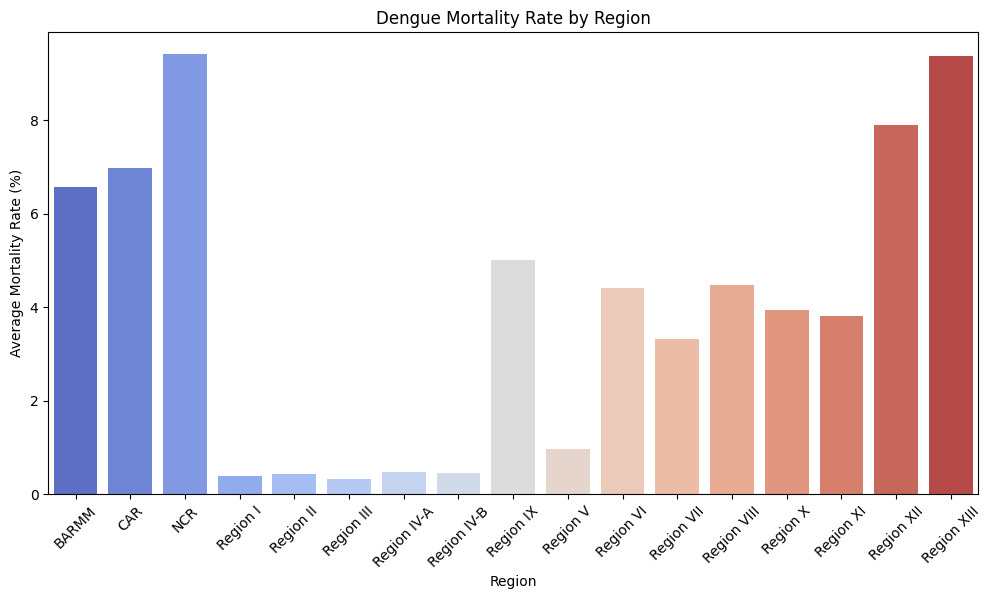

In [20]:
dengue["Mortality_Rate"] = (dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]) * 100
avg_mortality = dengue.groupby("Region")["Mortality_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_mortality.index, y=avg_mortality.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Average Mortality Rate (%)")
plt.title("Dengue Mortality Rate by Region")
plt.show()


<h1> Insight 15 </h1>

<h1> NCR and Region XII have the highest </h1>

<h1> Question 16 : What is the median number of dengue cases per year </h1>

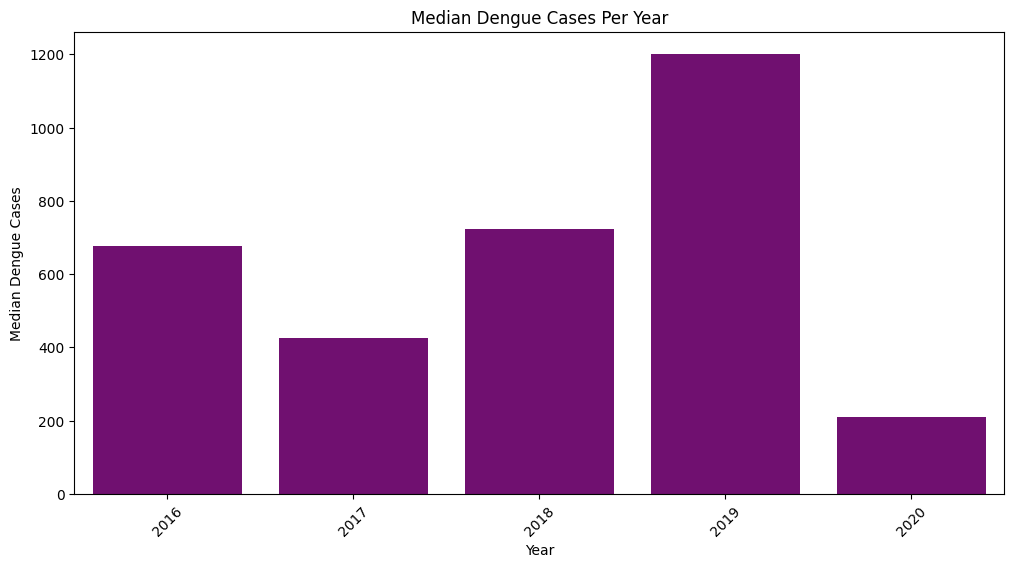

In [21]:
median_cases_per_year = dengue.groupby("Year")["Dengue_Cases"].median()

plt.figure(figsize=(12, 6))
sns.barplot(x=median_cases_per_year.index, y=median_cases_per_year.values, color="purple")
plt.xlabel("Year")
plt.ylabel("Median Dengue Cases")
plt.title("Median Dengue Cases Per Year")
plt.xticks(rotation=45)
plt.show()


<h1> Insight 16 </h1>

<h1> 2019 has the highest median </h1>

<h1> Question 17 : What is the highest recorded number of dengue cases in a single month </h1>

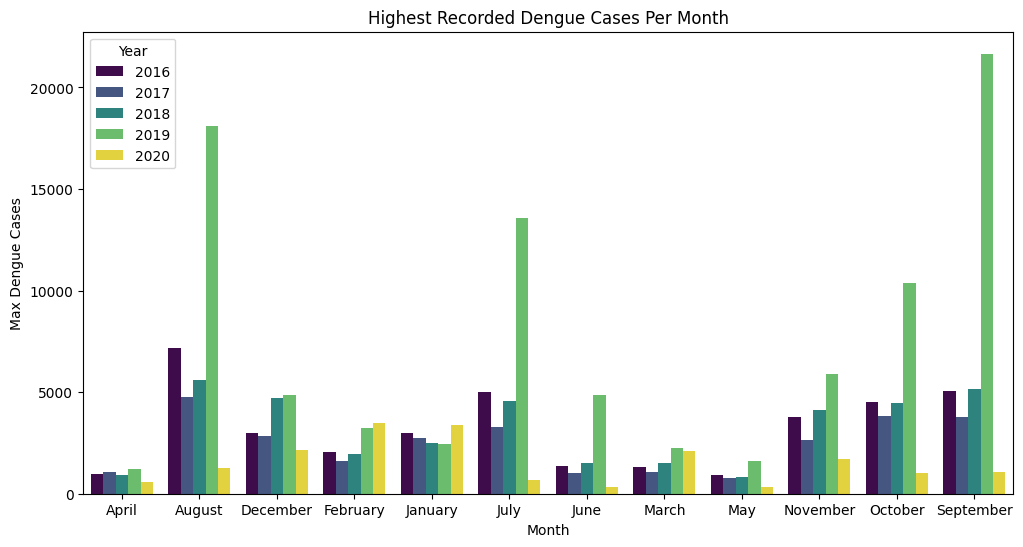

In [22]:
max_cases_month = dengue.groupby(["Year", "Month"])["Dengue_Cases"].max().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=max_cases_month["Month"], y=max_cases_month["Dengue_Cases"], hue=max_cases_month["Year"], palette="viridis")
plt.xlabel("Month")
plt.ylabel("Max Dengue Cases")
plt.title("Highest Recorded Dengue Cases Per Month")
plt.show()


<h1> Insight 17 </h1>

<h1> In 2019 Septemper accumulate over 20000 Dengue Cases </h1>

<h1> Question 18 : What percentage of total dengue cases does each year contribute </h1>

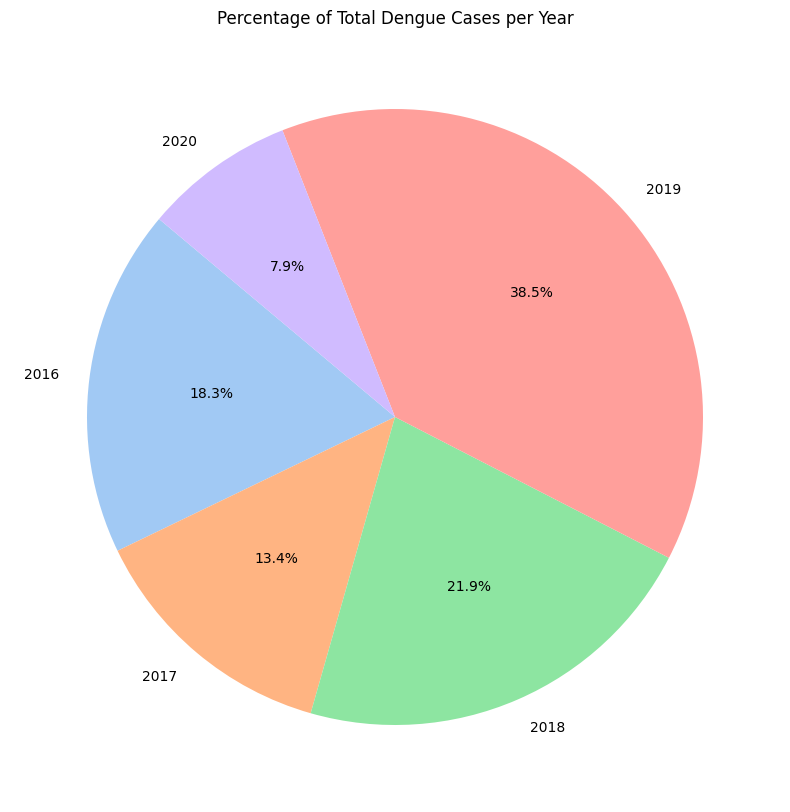

In [23]:
cases_per_year = dengue.groupby("Year")["Dengue_Cases"].sum()
plt.figure(figsize=(12, 10))
plt.pie(cases_per_year, labels=cases_per_year.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Percentage of Total Dengue Cases per Year")
plt.show()


<h1> Insight 18 </h1>

<h1> 2019 have the 38.5 percentage </h1>

<h1> How often do dengue deaths exceed 50 per region </h1>

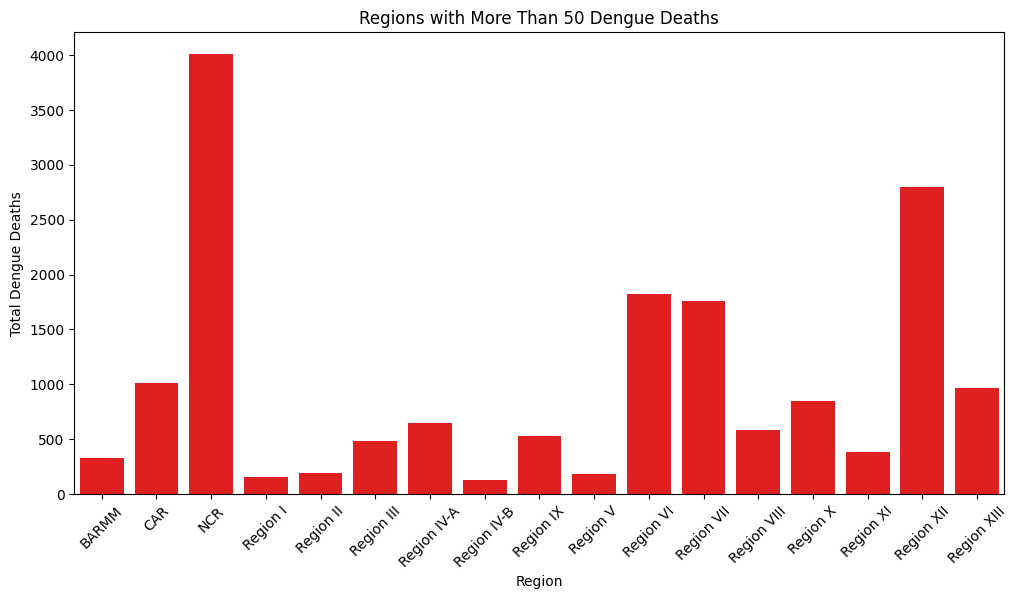

In [24]:
high_death_regions = dengue.groupby("Region")["Dengue_Deaths"].sum()
high_death_regions = high_death_regions[high_death_regions > 50]
plt.figure(figsize=(12, 6))
sns.barplot(x=high_death_regions.index, y=high_death_regions.values, color="red")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Total Dengue Deaths")
plt.title("Regions with More Than 50 Dengue Deaths")
plt.show()


<h1> Insight 19 </h1>

<h1> NCR has the highest number of dengue-related deaths, followed by Region XII and Region VI. </h1>

<h1> Question 20 : What is the trend of dengue cases in the past 5 years </h1>

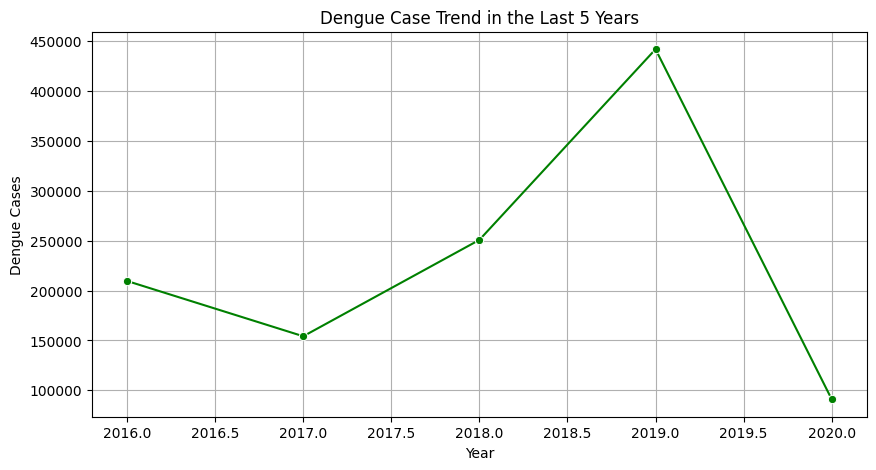

In [25]:
recent_cases = dengue[dengue["Year"] >= dengue["Year"].max() - 5].groupby("Year")["Dengue_Cases"].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=recent_cases.index, y=recent_cases.values, marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.title("Dengue Case Trend in the Last 5 Years")
plt.grid()
plt.show()


<h1> Insight 20 </h1>

<h1> Dengue incidence peaked in 2019, followed by a huge decrease in 2020. </h1>